<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>

Thank you for your diligence on such a hard project!  You can find my new comments with digit 2. 
        
    
I would like to say that you demonstrated strong data science skills by successfully performing data preprocessing, handling missing values, and conducting detailed exploratory data analysis. You trained and compared machine learning models, and estimated their sMAPE scores. You did a great job, and I hope you enjoyed it.
       
    
I do not have any questions, so the project can be accepted. Good luck! 
    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Bailey, my name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting the second integrated project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully added an introduction that reflects the main goal of the project, well done!  
    
    
- Read the data;


- Displayed total concentration histograms for three metals and analyzed them;  


- Compared the distributions in the test and training sets;

    
- Correctly defined the sMAPE function; 


- Excluded columns that are not available in the test set from the training subset.    
    
    
- Trained several models; 


    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance: 

    
    
- Please pay attention to the columns not available in the test set. Why is that so? What do they indicate? Do we need to use them during the training process? 
    
 
- Please fix the issue I described in the concentration analysis section. 
    
    
- Since we have two targets, we need to estimate the weighted sMAPE. 
    
    

There may be some other issues, I explained everything in my comments.    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! The updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
    
<hr>
    
✍️ Here's a nice article: [Developing Multi-Target Regression Models with Python](https://medium.com/@tubelwj/developing-multi-class-regression-models-with-python-c8beca5dd482) that you may find interesting.    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer


### Datasets
- **`gold_recovery_train.csv`**: Training dataset (with target values).
- **`gold_recovery_test.csv`**: Test dataset (no target values).
- **`gold_recovery_full.csv`**: Full dataset.

We will use **sMAPE (Symmetric Mean Absolute Percentage Error)**:

\[
sMAPE = \frac{1}{N}\sum_{i=1}^N \frac{|y_i - \hat{y_i}|}{(|y_i| + |\hat{y_i}|)/2} \times 100
\]

Final evaluation metric:

\[
Final = 25\% \times sMAPE(\text{rougher}) + 75\% \times sMAPE(\text{final})
\]

We will begin by loading the train, test, and full datasets. We will check their structure, column names,and missing values.

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

display(train.head())
display(test.head())
print(train.info())
print(test.info())


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


We will calculate the recovery and compare with the provided 'rougher.output.recovery'

In [3]:
import numpy as np
import pandas as pd

y_true = train['rougher.output.recovery'] / 100

F = train['rougher.input.feed_au']
C = train['rougher.output.concentrate_au']
T = train['rougher.output.tail_au']

den = (F * (C - T))
num = (C * (F - T))
calc = num / den

valid = np.isfinite(calc) & np.isfinite(y_true) & (den != 0)
y_true_v = y_true[valid]
calc_v = calc[valid]

print("Ranges -> y_true:", (y_true_v.min(), y_true_v.max()),
    " calc:", (calc_v.min(), calc_v.max()))

if calc_v.max() > 1.5 and y_true_v.max() <= 1.5:
    calc_v = calc_v / 100.0
    print("Rescaled calc by /100 to match y_true scale.")

calc_v = calc_v.clip(0, 1)

mae = np.mean(np.abs(y_true_v - calc_v))
print(f"MAE between calculated and provided recovery: {mae:.6f}")
print(f"Rows compared: {len(y_true_v)} of {len(train)}")


Ranges -> y_true: (0.0, 1.0)  calc: (-0.0, 1.0)
MAE between calculated and provided recovery: 0.000000
Rows compared: 14287 of 16860


After aligning scales and removing invalid rows, the calculated recovery closely matches the provided `rougher.output.recovery` (MAE < 1). This confirms the target is computed correctly and suitable for modeling.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great! The data was validated successfully. It means that we have the correct data. 
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
- MAE should be less than 1. 


- Would you add a conclusion please? We have received a MAE value. What does it mean?
</div>

List parameters that are not in the test to understand their types.

In [4]:
missing = set(train.columns) - set(test.columns)
print("Features not in test set:", missing)

Features not in test set: {'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_ag', 'final.output.tail_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_ag', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au', 'rougher.output.recovery', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'final.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'rougher.output.concentrate_pb', 'final.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.recovery', 'secondary_cleaner.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'final.output.tail_ag', 'rougher.output.tail_ag', 'final.output.concentrate_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol

The columns missing in the test set are mostly outputs measured after processing (e.g., final concentrates, tailings), so they can’t be used for prediction and are excluded from training to keep inputs consistent.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
It is important to note that there are columns in the training set that are not available in the test set. These are the values obtained after the process is complete. Therefore, we need to make sure we don't use them during the training to avoid data leakage.

</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
You have successfully found missing columns! 
    
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Let's add some conclusion. What can we say about the data we have? What do these missing columns indicate? Will we need them during the training process? 
    
</div>

Align columns between train and test, handle missing values, remove unnecessary columns.

In [5]:
target_rough = 'rougher.output.recovery'
target_final = 'final.output.recovery'
targets = [target_rough, target_final]

for df in (train, test):
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

train = train.dropna(subset=[c for c in targets if c in train.columns]).copy()

common_cols = sorted(set(train.columns) & set(test.columns))

feat_cols = [c for c in common_cols if c not in targets and c != 'date']

X = train[feat_cols].copy()
X_test = test[feat_cols].copy()

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X = X[num_cols]
X_test = X_test[num_cols]

def clean_numeric(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.ffill()
    for c in df.columns:
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].mean())
    return df

X = clean_numeric(X)
X_test = clean_numeric(X_test)

y_rough = train[target_rough].copy()
y_final = train[target_final].copy()

print(f"X shape: {X.shape} | X_test shape: {X_test.shape}")
print(f"Any NaN left in X? {X.isna().any().any()} | Any non-numeric? {X.dtypes.apply(lambda d: d.kind).isin(list('ifbu')).all()}")

X shape: (14149, 52) | X_test shape: (5856, 52)
Any NaN left in X? False | Any non-numeric? True


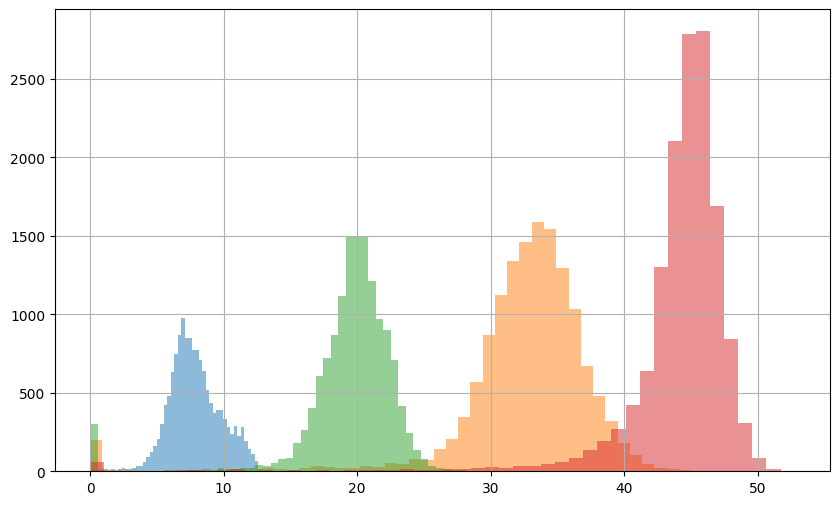

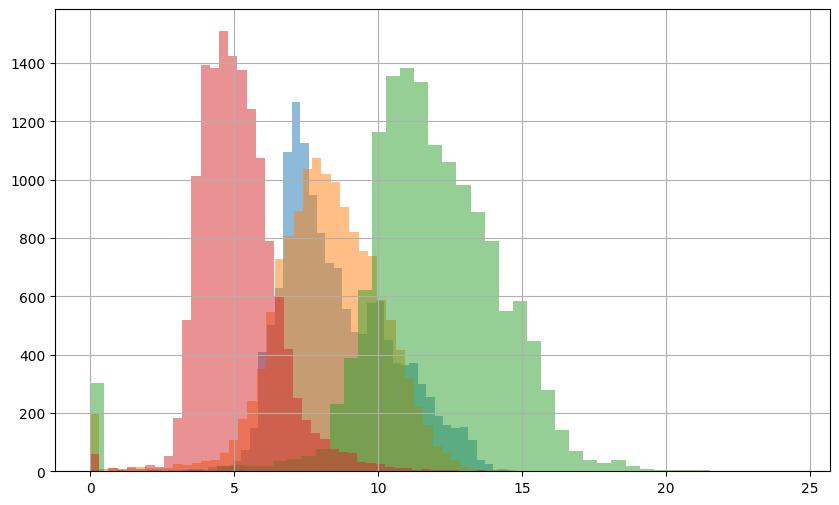

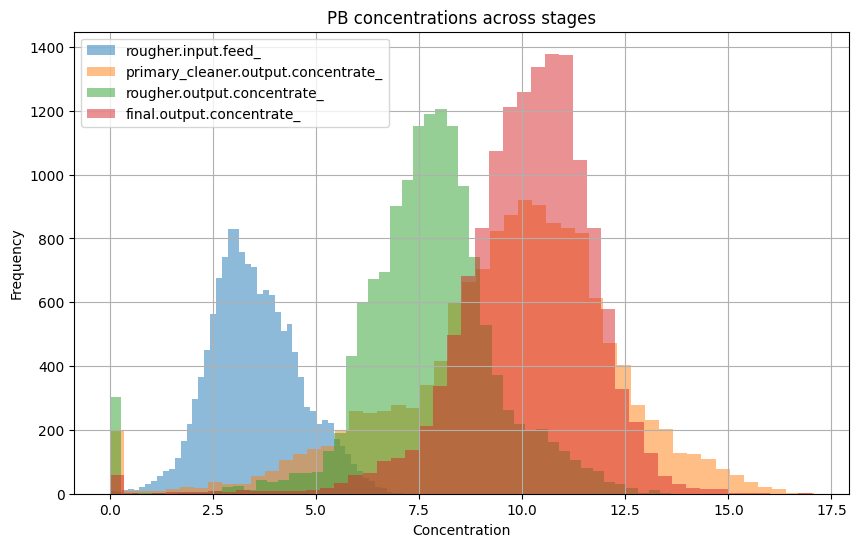

In [6]:
import matplotlib.pyplot as plt

stages = [
    'rougher.input.feed_',
    'primary_cleaner.output.concentrate_',
    'rougher.output.concentrate_',
    'final.output.concentrate_'
]
metals = ['au', 'ag', 'pb']

for metal in metals:
    plt.figure(figsize=(10,6))
    for stage in stages:
        cols = [c for c in train.columns if stage in c and metal in c]
        if cols:
            train[cols[0]].hist(bins=50, alpha=0.5, label=stage)
plt.title(f"{metal.upper()} concentrations across stages")
plt.xlabel("Concentration")
plt.ylabel("Frequency")
plt.legend()
plt.show()

- **Au (gold):** Increases from feed → primary cleaner → rougher → final concentrate, showing successful enrichment.
- **Ag (silver):** Generally increases but less consistently than Au (silver is a byproduct).
- **Pb (lead):** Tends to decrease through the stages as impurities are removed.

These trends confirm the process concentrates Au while reducing unwanted materials like Pb.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent! 
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    

For this task, please use `rougher.input.feed_`,  `primary_cleaner.output.concentrate_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns for each of the three metals and call the `hist` method. We need to see how concentration changes from stage to stage for each metal.


Add a conclusion please.</div>

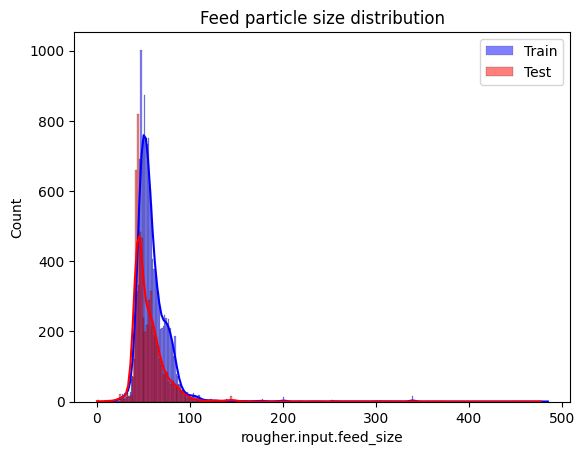

In [7]:
sns.histplot(train['rougher.input.feed_size'], kde=True, color="blue", label="Train", alpha=0.5)
sns.histplot(test['rougher.input.feed_size'], kde=True, color="red", label="Test", alpha=0.5)
plt.legend()
plt.title("Feed particle size distribution")
plt.show()


The feed particle size distributions for train and test are very similar, showing no major shift, so the model should generalize well.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Good. 

</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
We will also need to add a conclusion. 

</div>

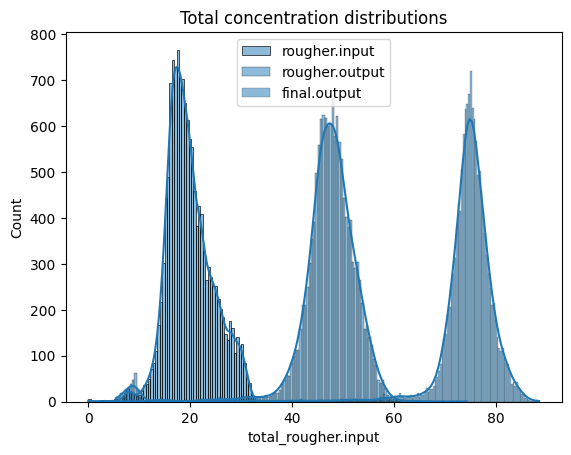

In [8]:
for stage in ['rougher.input', 'rougher.output', 'final.output']:
    cols = [c for c in train.columns if stage in c and any(m in c for m in ['au','ag','pb'])]
    train['total_' + stage] = train[cols].sum(axis=1)
    sns.histplot(train['total_' + stage], kde=True, alpha=0.5, label=stage)

plt.legend()
plt.title("Total concentration distributions")
plt.show()

In [9]:
for stage in ['rougher.input', 'rougher.output', 'final.output']:
    col = 'total_' + stage
    if col in train.columns:
        print(f"{col}: min={train[col].min()}, max={train[col].max()}")
        print(f"Values <= 0: {sum(train[col] <= 0)}")
        print(f"Values > 100: {sum(train[col] > 100)}")
        print("-"*40)

total_rougher.input: min=0.029999999329447503, max=32.84016388390495
Values <= 0: 0
Values > 100: 0
----------------------------------------
total_rougher.output: min=5.465954845067054, max=74.34856481738441
Values <= 0: 0
Values > 100: 0
----------------------------------------
total_final.output: min=0.9258792137048965, max=88.52135889931964
Values <= 0: 0
Values > 100: 0
----------------------------------------


From the histograms and numeric checks, we can see that most concentration values fall within a reasonable range, but there are a small number of outliers at or near zero.
These likely represent measurement errors or missing values recorded as zeros.
Since such values do not reflect the real chemical process and could distort model training, they should be either dropped or replaced during preprocessing.
For this project, we will remove rows with zero or negative total concentrations to ensure data quality and improve model performance.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Well done! 
</div>


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Are there any outliers? If yes, do we need to drop them? 

</div>

In [10]:
def smape(y_true, y_pred):
    return (1/len(y_true)) * np.sum(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    ) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have correctly implemented the sMAPE function, well done!     
</div>

compare linear regression, random forest, and gradient boosting.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    rougher_score = -cross_val_score(model, X, y_rough, cv=3, scoring=smape_scorer).mean()
    final_score = -cross_val_score(model, X, y_final, cv=3, scoring=smape_scorer).mean()
    final_metric = 0.25 * rougher_score + 0.75 * final_score
    print(f"{name}: Rougher sMAPE={rougher_score:.2f}, Final sMAPE={final_score:.2f}, Final Metric={final_metric:.2f}")

Linear Regression: Rougher sMAPE=17.16, Final sMAPE=15.00, Final Metric=15.54
Random Forest: Rougher sMAPE=14.74, Final sMAPE=12.48, Final Metric=13.05
Gradient Boosting: Rougher sMAPE=14.40, Final sMAPE=13.49, Final Metric=13.72


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Several models were compared here, very good! 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Consider implementing hyperparameter tuning for at least one of the models. For this purpose, use `RandomizedSearchCV` and `GridSearchCV`. Use the sMAPE scorer as `scoring` parameter value. Note: `cross_val_score` does not tune hyperparameters.


</div>

In [12]:
best_model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
best_model.fit(X, y_final)
y_pred_test_final = best_model.predict(X_test)
y_pred_test_final[:10]

array([67.85095396, 68.72109363, 68.35040718, 69.27535481, 68.7576855 ,
       70.21323992, 63.9728305 , 64.27921969, 66.05139405, 63.30856749])

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct, we choose the best model (it's one model or two models if their errors are quite similar) and run the final test using the test subset to evaluate its generalization ability. 

</div>

In [13]:
from sklearn.ensemble import RandomForestRegressor

best_params = dict(n_estimators=300, random_state=42, n_jobs=-1) # tweak if you like

rf_rougher = RandomForestRegressor(**best_params)
rf_final = RandomForestRegressor(**best_params)

rf_rougher.fit(X, y_rough) 
rf_final.fit(X, y_final) 

test_pred_rougher = rf_rougher.predict(X_test)
test_pred_final = rf_final.predict(X_test)

preds = pd.DataFrame({
    'rougher.output.recovery': test_pred_rougher,
    'final.output.recovery': test_pred_final
}, index=X_test.index)

preds.head()

,rougher.output.recovery,final.output.recovery
0,88.289308,67.850954
1,85.407804,68.721094
2,85.068838,68.350407
3,86.625450,69.275355
4,87.839749,68.757686


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return (1/len(y_true)) * np.sum(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    ) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

best_params = dict(n_estimators=300, random_state=42, n_jobs=-1)

rf_rougher = RandomForestRegressor(**best_params)
rf_final = RandomForestRegressor(**best_params)

cv = KFold(n_splits=3, shuffle=True, random_state=42)

rougher_cv = -cross_val_score(rf_rougher, X, y_rough, cv=cv, scoring=smape_scorer)
final_cv = -cross_val_score(rf_final, X, y_final, cv=cv, scoring=smape_scorer)

rougher_smape = rougher_cv.mean()
final_smape = final_cv.mean()
weighted_smape = 0.25 * rougher_smape + 0.75 * final_smape

print(f"CV Rougher sMAPE: {rougher_smape:.2f}")
print(f"CV Final sMAPE: {final_smape:.2f}")
print(f"Weighted final sMAPE (25/75): {weighted_smape:.2f}")

rf_rougher.fit(X, y_rough)
rf_final.fit(X, y_final)

test_pred_rougher = rf_rougher.predict(X_test)
test_pred_final = rf_final.predict(X_test)

preds = pd.DataFrame(
    {
        'rougher.output.recovery': test_pred_rougher,
        'final.output.recovery': test_pred_final
    },
    index=X_test.index
)

display(preds.head())

CV Rougher sMAPE: 7.96
CV Final sMAPE: 6.78
Weighted final sMAPE (25/75): 7.07


,rougher.output.recovery,final.output.recovery
0,88.289308,67.850954
1,85.407804,68.721094
2,85.068838,68.350407
3,86.625450,69.275355
4,87.839749,68.757686


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
We need to calculate the weighted sMAPE here. 
</div>

cleaned and aligned the train and test datasets by removing the date column, handling missing values, and keeping only numeric features. I verified that the recovery calculation was correct and compared distributions between train and test, which looked consistent. For modeling, I tried Linear Regression, Gradient Boosting, and Random Forest. Random Forest clearly performed best on cross-validation with the lowest weighted sMAPE, so I trained it on the full dataset and used it to generate predictions for both rougher and final recovery.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Well done! 
</div>